# **Deep Neural Network**

# Import libraries

In [ ]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # data visualization
import seaborn as sns  # data visualization
import sklearn  # machine learning

# Import dataset

In [ ]:
# import digits dataset
from sklearn.datasets import load_digits
digits = load_digits(as_frame=True)
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

# Dataset to Pandas DataFrame

In [ ]:
# Put into a pandas dataframe with the target variable (which we will try to predict) as the last column
df_digits = pd.DataFrame(digits.data, columns=digits.feature_names)
df_digits['target'] = digits.target

In [ ]:
# First 10 value of the dataset
print(df_digits.head(10))

   pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0        0.0        0.0        5.0       13.0        9.0        1.0   
1        0.0        0.0        0.0       12.0       13.0        5.0   
2        0.0        0.0        0.0        4.0       15.0       12.0   
3        0.0        0.0        7.0       15.0       13.0        1.0   
4        0.0        0.0        0.0        1.0       11.0        0.0   
5        0.0        0.0       12.0       10.0        0.0        0.0   
6        0.0        0.0        0.0       12.0       13.0        0.0   
7        0.0        0.0        7.0        8.0       13.0       16.0   
8        0.0        0.0        9.0       14.0        8.0        1.0   
9        0.0        0.0       11.0       12.0        0.0        0.0   

   pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_7  pixel_7_0  \
0        0.0        0.0        0.0        0.0  ...        0.0        0.0   
1        0.0        0.0        0.0        0.0  ...        0.0     

# Plot some data

The digits dataset is made of 8x8 images of digits so we can directly visualize the data

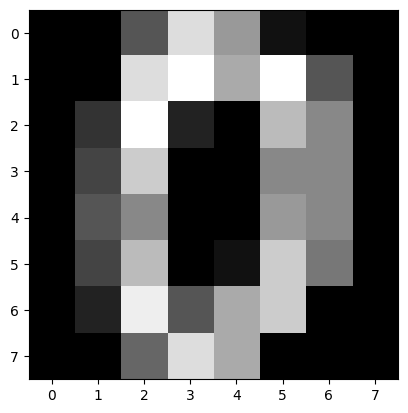

In [ ]:
# Plot the first image of the dataset
plt.imshow(digits.images[0])

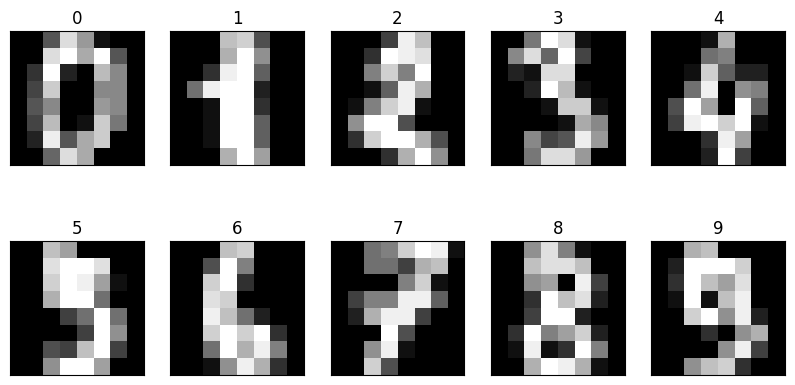

In [ ]:
# Plot the first 10 images with the target value as title
fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={'xticks': (), 'yticks': ()})
for ax, img, target in zip(axes.ravel(), digits.images, digits.target):
    ax.imshow(img)
    ax.set_title(target)

# Exploratory data analysis

In [ ]:
# Shape of the dataset (nb of rows and columns)
print(df_digits.shape)

# Name of the columns
print(df_digits.columns)

(1797, 65)
Index(['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4',
       'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1',
       'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6',
       'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3',
       'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0',
       'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5',
       'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2',
       'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7',
       'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4',
       'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1',
       'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6',
       'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3',
       'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7', 'target'],
      dtype='object')


In [ ]:
# Print dataset info
df_digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

In [ ]:
# Print the description of the dataset (mean, std, min, max, quartiles)
print(df_digits.describe())

       pixel_0_0    pixel_0_1    pixel_0_2    pixel_0_3    pixel_0_4  \
count     1797.0  1797.000000  1797.000000  1797.000000  1797.000000   
mean         0.0     0.303840     5.204786    11.835838    11.848080   
std          0.0     0.907192     4.754826     4.248842     4.287388   
min          0.0     0.000000     0.000000     0.000000     0.000000   
25%          0.0     0.000000     1.000000    10.000000    10.000000   
50%          0.0     0.000000     4.000000    13.000000    13.000000   
75%          0.0     0.000000     9.000000    15.000000    15.000000   
max          0.0     8.000000    16.000000    16.000000    16.000000   

         pixel_0_5    pixel_0_6    pixel_0_7    pixel_1_0    pixel_1_1  ...  \
count  1797.000000  1797.000000  1797.000000  1797.000000  1797.000000  ...   
mean      5.781859     1.362270     0.129661     0.005565     1.993879  ...   
std       5.666418     3.325775     1.037383     0.094222     3.196160  ...   
min       0.000000     0.000000    

The describe function is not very interesting for this dataset, but we can see that the number of values correspond to the shape function. The range of pixel is between 0 and 16 as written in the description of the dataset.

### Frequency distribution of values in categorical variables

In [ ]:
# Names of the target values + newline
print(digits.target_names, "\n")

# Count of each target value
print(df_digits['target'].value_counts(), "\n")

# Same as above but in percentage
print(df_digits['target'].value_counts(normalize=True), "\n")

[0 1 2 3 4 5 6 7 8 9] 

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: target, dtype: int64 

3    0.101836
1    0.101280
5    0.101280
4    0.100723
6    0.100723
9    0.100167
7    0.099610
0    0.099054
2    0.098497
8    0.096828
Name: target, dtype: float64 



The frequency distribution shows that the dataset is well balanced. Which is good for the training of the neural network.

### Missing values in variables

In [ ]:
# Number of missing values in each column
print(df_digits.isnull().sum())

pixel_0_0    0
pixel_0_1    0
pixel_0_2    0
pixel_0_3    0
pixel_0_4    0
            ..
pixel_7_4    0
pixel_7_5    0
pixel_7_6    0
pixel_7_7    0
target       0
Length: 65, dtype: int64


We can see that there are no missing values in the dataset.

In [ ]:
# Correlation matrix between all the features
df_digits.corr()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
pixel_0_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel_0_1,NaN,1.000000,0.556618,0.207814,-0.018761,0.060776,0.048388,-0.038927,0.032320,0.556372,...,-0.045342,-0.007905,0.855610,0.555727,0.147646,-0.102349,-0.029870,0.026547,-0.043889,-0.051834
pixel_0_2,NaN,0.556618,1.000000,0.560180,-0.084235,0.043569,0.002841,-0.062278,0.022311,0.582259,...,-0.003804,-0.025837,0.515276,0.937623,0.499840,-0.134754,-0.041183,0.072599,0.082523,-0.011836
pixel_0_3,NaN,0.207814,0.560180,1.000000,0.023938,-0.171377,-0.115732,-0.040139,0.035663,0.328344,...,0.075335,-0.049085,0.175804,0.560326,0.767945,-0.065957,-0.054936,0.053437,0.081971,-0.011489
pixel_0_4,NaN,-0.018761,-0.084235,0.023938,1.000000,0.507731,0.127764,0.010065,0.042065,0.051657,...,-0.212220,0.017352,-0.047223,-0.020176,-0.008867,-0.082125,-0.215809,-0.250699,-0.215349,0.100801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pixel_7_4,NaN,-0.102349,-0.134754,-0.065957,-0.082125,-0.351146,-0.383522,-0.178243,0.048996,-0.000604,...,0.105101,0.005697,-0.117908,-0.207957,0.058390,1.000000,0.609515,0.243305,0.103015,-0.196083
pixel_7_5,NaN,-0.029870,-0.041183,-0.054936,-0.215809,-0.268818,-0.304111,-0.141174,0.033409,0.071488,...,0.262795,-0.003056,-0.043889,-0.091839,-0.094956,0.609515,1.000000,0.648328,0.261991,-0.079100
pixel_7_6,NaN,0.026547,0.072599,0.053437,-0.250699,-0.267659,-0.178945,-0.063220,0.020689,0.111569,...,0.511726,-0.011932,0.014557,0.035369,0.006849,0.243305,0.648328,1.000000,0.620428,-0.114007
pixel_7_7,NaN,-0.043889,0.082523,0.081971,-0.215349,-0.167727,-0.080309,-0.024505,-0.005226,-0.001404,...,0.563989,-0.004625,-0.047089,0.031193,0.099671,0.103015,0.261991,0.620428,1.000000,-0.181929


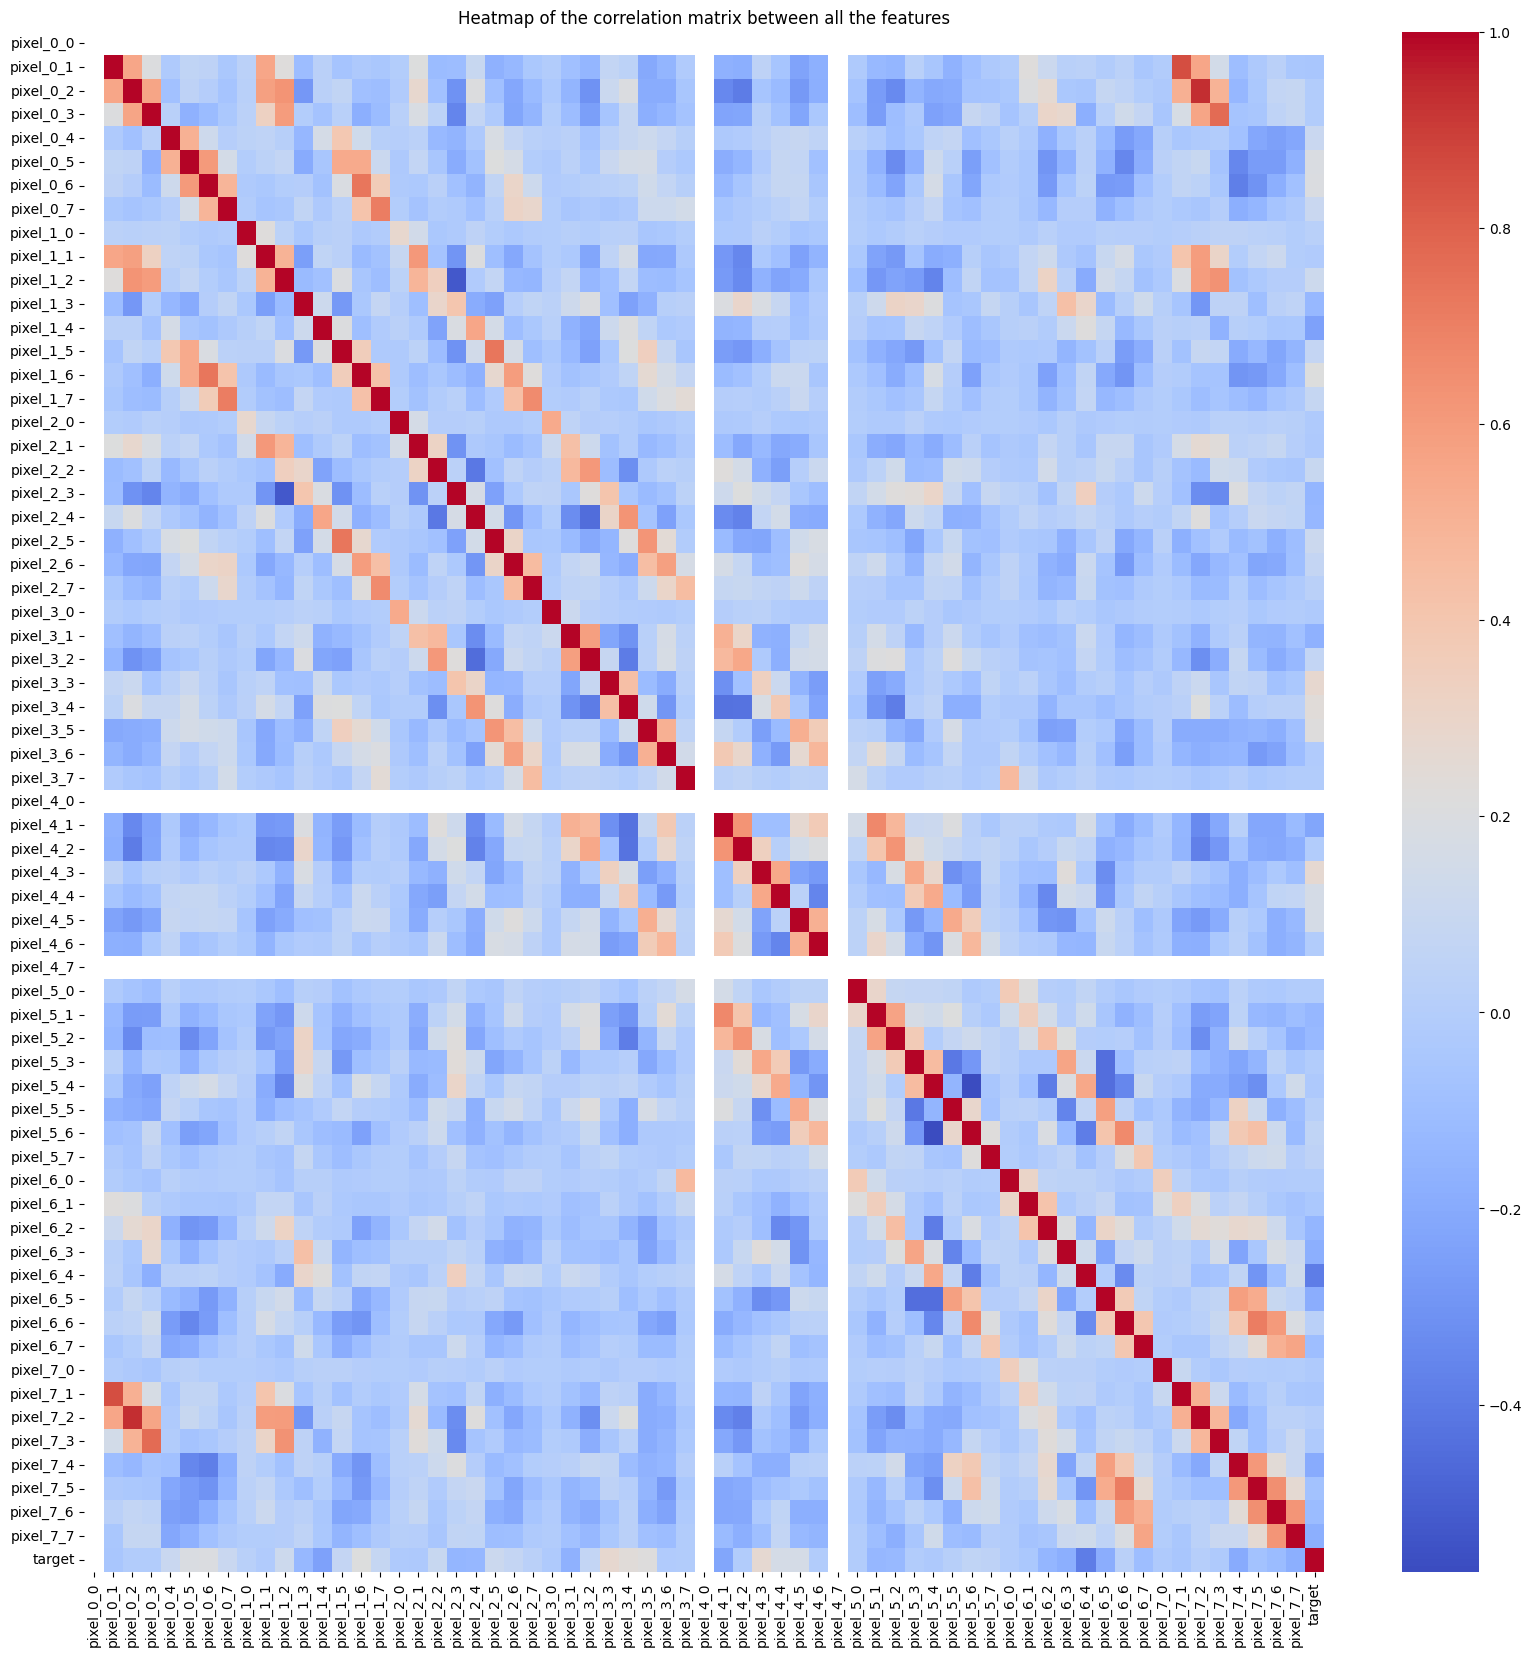

In [ ]:
# Heatmap of the correlation matrix
plt.figure(figsize=(20, 20))
plt.title("Heatmap of the correlation matrix between all the features")
# Annot = True to print the values inside the square
sns.heatmap(df_digits.corr(), annot=False, cmap='coolwarm')
plt.show()


In [ ]:
# print the most correlated features with the target variable (absolute value)
print(df_digits.corr()['target'].abs().sort_values(ascending=False))

target       1.000000
pixel_6_4    0.390625
pixel_3_3    0.275468
pixel_4_3    0.265880
pixel_1_4    0.244489
               ...   
pixel_5_3    0.006342
pixel_4_6    0.006153
pixel_0_0         NaN
pixel_4_0         NaN
pixel_4_7         NaN
Name: target, Length: 65, dtype: float64


From the correlation matrix, we can see that most features are equally correlated with the target variable. So we will need to use all the features to train the neural network.

# Split data into separate training and test sets

In [ ]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_digits.drop('target', axis=1), df_digits['target'], test_size=0.2, random_state=1)

In [ ]:
# Check the shapes
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1437, 64) (360, 64)
(1437,) (360,)


In [ ]:
# Number of values for each target in the training & testing set
print(y_train.value_counts())
print(y_test.value_counts())

5    152
1    147
9    146
8    145
6    144
4    143
7    142
3    142
2    141
0    135
Name: target, dtype: int64
0    43
3    41
4    38
7    37
6    37
2    36
1    35
9    34
5    30
8    29
Name: target, dtype: int64


# Multi-Layer Perceptron(MLP)

![Multi-Layer Perceptron](https://www.researchgate.net/publication/334609713/figure/fig1/AS:783455927406593@1563801857102/Multi-Layer-Perceptron-MLP-diagram-with-four-hidden-layers-and-a-collection-of-single.jpg)

Multi-Layer Perceptron (MLP) diagram with four hidden layers and a collection of single nucleotide polymorphisms (SNPs) as input and illustrates a basic "neuron" with n inputs. One neuron is the result of applying the nonlinear transformations of linear combinations (xi, wi, and biases b).

In [ ]:
# Use of a MLP Classifier to predict the target variable
from sklearn.neural_network import MLPClassifier

# Create the model with 3 layers of 32 neurons each
mlp = MLPClassifier(hidden_layer_sizes=(32, 32, 32), verbose=True, random_state=1) 

# Train the model
mlp.fit(X_train, y_train)

# Accuracy of the model on the training set
print("Training set score: %f" % mlp.score(X_train, y_train))

Iteration 1, loss = 4.29938002
Iteration 2, loss = 2.90982733
Iteration 3, loss = 2.40085329
Iteration 4, loss = 2.10231050
Iteration 5, loss = 1.86019573
Iteration 6, loss = 1.62838418
Iteration 7, loss = 1.43113920
Iteration 8, loss = 1.26635458
Iteration 9, loss = 1.11866274
Iteration 10, loss = 0.98587889
Iteration 11, loss = 0.85850976
Iteration 12, loss = 0.74187013
Iteration 13, loss = 0.65011599
Iteration 14, loss = 0.57014826
Iteration 15, loss = 0.50326519
Iteration 16, loss = 0.45297345
Iteration 17, loss = 0.40835854
Iteration 18, loss = 0.36972105
Iteration 19, loss = 0.33577456
Iteration 20, loss = 0.30738915
Iteration 21, loss = 0.28485562
Iteration 22, loss = 0.27112416
Iteration 23, loss = 0.25160367
Iteration 24, loss = 0.23078797
Iteration 25, loss = 0.21130135
Iteration 26, loss = 0.19871292
Iteration 27, loss = 0.18326164
Iteration 28, loss = 0.17248055
Iteration 29, loss = 0.16094323
Iteration 30, loss = 0.15149905
Iteration 31, loss = 0.14331638
Iteration 32, los

In [ ]:
from sklearn.metrics import accuracy_score

# Predict the target variable
predictions = mlp.predict(X_test)

print(predictions[:25])
print(y_test[:25].values)

# Accuracy of the model on the testing set
print("Testing set score: %f" % accuracy_score(predictions, y_test))

[1 5 0 7 1 0 6 8 5 4 9 2 7 8 4 6 9 3 7 4 7 4 8 6 0]
[1 5 0 7 1 0 6 1 5 4 9 2 7 8 4 6 9 3 7 4 7 1 8 6 0]
Testing set score: 0.963889


# Confusion matrix

A confusion matrix helps summarize the performance of a classification algorithm. A confusion matrix will give a clear picture of the perfomance of a classification model as well as the types of errors produced by the it. <br>
It gives a summary of correct and incorrect predictions broken down by each category. 


Four types of outcomes are possible while evaluating a classification model performance :


**True Positives (TP)** – We predict that an observation belongs to a certain class *x* and the observation actually belongs to that class *x*.


**True Negatives (TN)** – We predict that an observation does not belong to a certain class *x* and the observation actually does not belong to that class *x*.


**False Positives (FP)** – We predict that an observation belongs to a certain class *x* but the observation actually **does not belong** to that class *x*. This type of error is called Type I error.



**False Negatives (FN)** – We predict that an observation does not belong to a certain class *x* but the observation **actually belongs** to that class *x*. This is a very serious error and it is called Type II error.



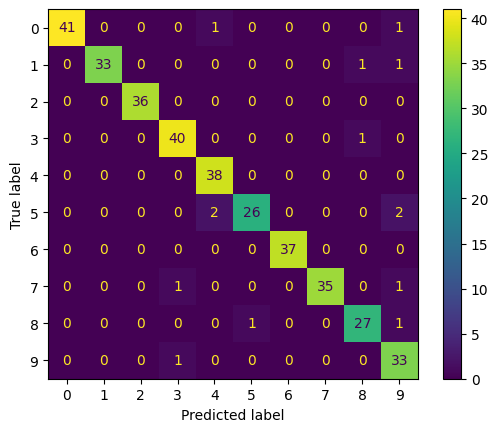

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
disp.plot()
plt.show()

# Cross Validation 

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross validation with 5 different splits
scores = cross_val_score(mlp, df_digits.drop('target', axis=1), df_digits['target'], cv=5)
print("Cross-validation scores: {}".format(scores))
print("Mean cross-validation score: {:.2f}".format(scores.mean()))
print("Standard deviation of cross-validation score: {:.2f}".format(scores.std()))

Cross-validation scores: [0.96388889 0.88333333 0.95264624 0.93593315 0.91086351]
Mean cross-validation score: 0.93
Standard deviation of cross-validation score: 0.03


# Classification Report

**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

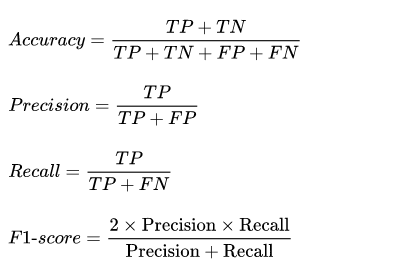


In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       1.00      0.94      0.97        35
           2       1.00      1.00      1.00        36
           3       0.95      0.98      0.96        41
           4       0.93      1.00      0.96        38
           5       0.96      0.87      0.91        30
           6       1.00      1.00      1.00        37
           7       1.00      0.95      0.97        37
           8       0.93      0.93      0.93        29
           9       0.85      0.97      0.90        34

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



# References : 
1. https://scikit-learn.org/
2. https://www.researchgate.net/publication/334609713_A_Guide_for_Using_Deep_Learning_for_Complex_Trait_Genomic_Prediction/figures?lo=1